회귀모델

- 지도학습(정답 데이터 필수)
- 예측

- 도미와 빙어를 구분하는 머신러닝 모델을 성공적으로 개발한 후 자신감이 생겼음
- 새로운 요구사항이 있음

현재상황: 여름 농어철로 농어주문이 크게 늘어나, 마켓은 업계 최초로 농어를 무게
단위로 판매하고자 함(농어를 마리당 가격으로 판매했더니 볼품없는 농어를 받는 고객이
항의)

요구사항: 농어의 길이를 가지고 무게를 예측

### 1. K-NN 회귀
- 분류와 동일하게 임의의 데이터의 예측값을 예측하기 위해서 K개의 이웃의 수치데이터를 바탕으로 평균을 내어 예측하는 방법

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

### 1. Data Load

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
print(type(perch_length))
print(type(perch_weight))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
print(len(perch_length))
print(len(perch_weight))

56
56


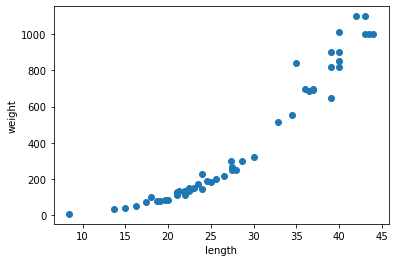

In [5]:
# 농어의 길이가 늘어나면, 무게도 늘어난다
# => 양의 상관관계(시험!)
# 상관계수값: -1 ~ 1
# 1에 가까울수록 양의 상관관계
# -1에 가까울수록 음의 상관과계
# 0에 가까울수록 관계 없음
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 2. Train / Test Split

In [6]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [7]:
# 75% : 25%
print(train_input.shape, test_input.shape)

(42,) (14,)


In [8]:
print(train_input)

[19.6 22.  18.7 17.4 36.  25.  40.  39.  43.  22.  20.  22.  24.  27.5
 43.  40.  24.  21.  27.5 40.  32.8 26.5 36.5 13.7 22.7 15.  37.  35.
 28.7 23.5 39.  21.  23.  22.  44.  22.5 19.  37.  22.  25.6 42.  34.5]


### 3. Data Preprocess

- scikit-learn 모듈: 머신러닝 모델 사용  
   => 모델 입력데이터 2차원 배열값으로 입력

> 1차원 배열 [1, 2, 3, 4, 5]

> 2차원 배열 [[1], [2], [3], [4], [5]]

In [9]:
print(perch_length.shape) # 1차원 배열인것을 알 수 있음

(56,)


In [10]:
# reshape() => shape을 변형
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

(4,)


In [11]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [12]:
test_array

array([[1, 2],
       [3, 4]])

In [13]:
# -1을 사용하며 -1이 표시된 곳은 상관없고 그 다음에 있는 숫자 shape만 맞춰라
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [14]:
print(test_input)

[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


In [15]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [16]:
from sklearn.neighbors import KNeighborsRegressor

In [17]:
knr = KNeighborsRegressor()

In [25]:
knr.fit(train_input, train_target) # 과소적합

KNeighborsRegressor()

### 5. 결정계수
상관계수(r)
- 두 양적변수간 회귀관계 측정
- 상관관계 정도를 나타냄
- -1~1사이의 값

결정계수(r^2)
- 회귀선에 각각의 값들이 얼마나 가까운지를 측정
- 회귀선이 얼마나 실제 값을 잘 예측할 수 있는지를 말해줌
- 0 ~1사이의 값
- r^2의 값이 1에 가까워질수록 정확해진다(정확도 up)

$R^2 = 1- (타깃-예측)^2의 합 / (타깃-평균)^2의 합$

In [19]:
# 결정계수(ㄱ^2 or r**2)
knr.score(test_input, test_target)

0.992809406101064

In [23]:
knr.score(train_input, train_target)

0.9698823289099254

### 6. MAE(Mean Absolute Error)
- 타깃과 예측의 절대값의 오차를 평균해서 반환

In [20]:
from sklearn.metrics import mean_absolute_error

In [21]:
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


#### 7. 과대적합(Over fitting) vs 과소적합(Under fitting)  - 매우중요
- Train 성능은 좋은데, Test 성능은 좋지 않음      => 과대적합(훈련세트에서만 잘 동작) - 내가 학습한 데이터에서만 결과가 잘 나옴
- Train보다 Test 성능이 더 좋거나, 둘다 좋지 않음 => 과소적합

- 훈련(Train) 세트가 전체 데이터를 대표한다고 가정하기 때문에 훈련 세트를 잘 학습하는 것이 중요

> 과소적합이 나타나는 이유는 Train, Test 데이터 세트 크기가 매우 작거나, Test 데이터가 Train의 특징을 다 담지 못하는 경우

> 중요: 일반화 된 모델을 만드는 것이 중요!!!!

병원 예) 요양병원 환자 데이터 => 한국 주요 질병을 예측하는 모델
=> 고령화 환자에게만 잘 맞는 모델이 생성 됨(일반화 X)

> Best 모델: Train 데이터를 사용한 평가 결과가 조금 더 높게

> 이유는 Train으로 학습했기 때문에 Train 데이터에서 조금 더 높은 성능을 보여

#### 현재 우리 모델은 과소적합
- 과소적합을 해결하기 위해서는 모델을 조금 더 복잡하게 만들면 됨(훈련 데이터에 맞게)
- K-NN은 K의 크기를 줄이면 모델이 더 복잡해짐
  + K를 줄이면 국지적인 패턴에 민감해짐
  + K를 늘이면 데이터 전반에 있는 일반적인 패턴을 따름

In [27]:
knr.n_neighbors = 3

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [28]:
print(knr.score(test_input, test_target))

0.9746459963987609
